# **Objective Of The Project:**  
To analyze and predict laptop prices using machine learning regression techniques, leveraging a dataset of laptop specifications. The project aims to develop a predictive model that estimates laptop prices based on key features such as brand, processor, RAM, storage, and other relevant attributes.

# **Loading the required library**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/laptop_prices.csv') # loading the dataset

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


**KEY INSIGHT: There are no outliers present in our dataset.**



In [ ]:
df.describe(include='object')

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,9,4,2,2,2,3,93,4,4,4,110
top,Dell,XPS 13,Notebook,Windows 10,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
freq,291,30,707,1048,835,1087,918,1258,1214,193,837,1067,704,279


**Data Cleaning**

In [ ]:
num_null=df.isnull().sum().sum() # checking the null values
print(f"There are {num_null} null values present in our dataset")


There are 0 null values present in our dataset


In [ ]:
num_duplicates=df.duplicated().sum() # checking the duplicates rows / data
print(f"There are {num_duplicates} duplicated records in the dataset.")


There are 0 duplicated records in the dataset.


In [ ]:
df.nunique()

,0
Company,19
Product,618
TypeName,6
Inches,18
Ram,9
OS,9
Weight,171
Price_euros,791
Screen,4
ScreenW,13


In [ ]:
df['Company'].unique() #checking font style of company

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

# **Exploratory Data Analysis (EDA)**

<Axes: xlabel='Company'>

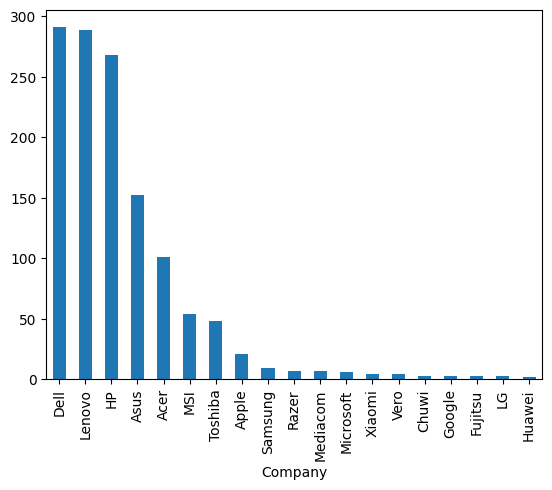

In [ ]:
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='OS'>

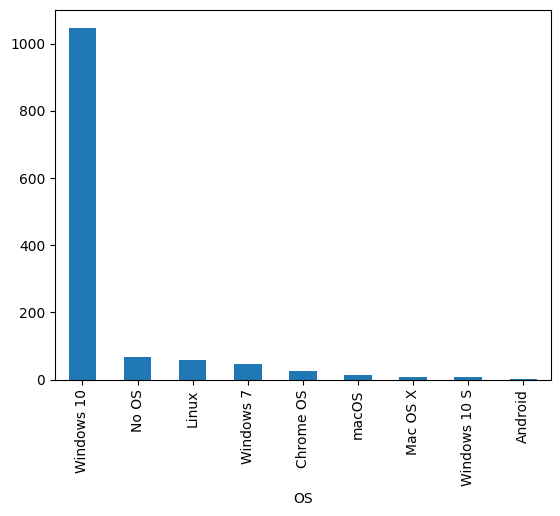

In [ ]:
df['OS'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram'>

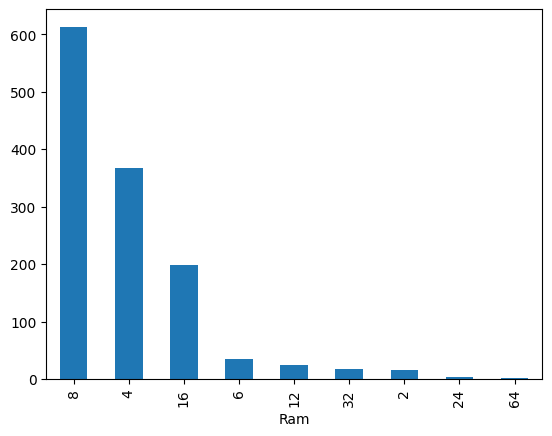

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

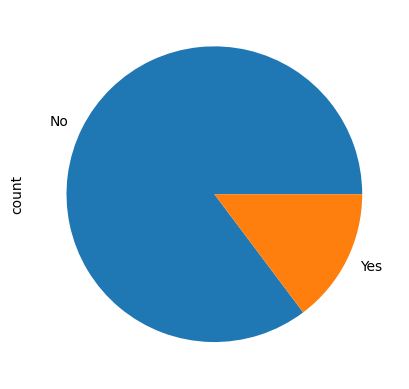

In [ ]:
df['Touchscreen'].value_counts().plot(kind='pie')

<Axes: xlabel='PrimaryStorage'>

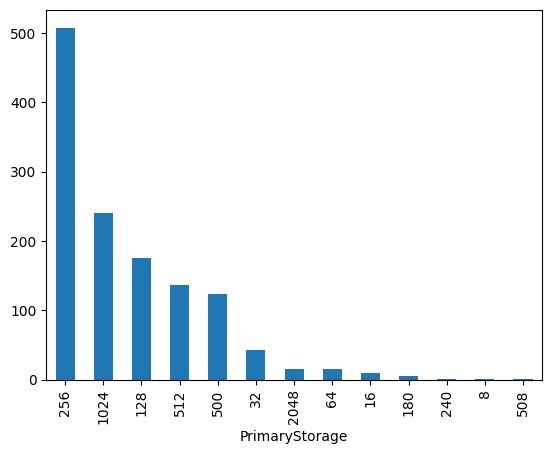

In [ ]:
df['PrimaryStorage'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

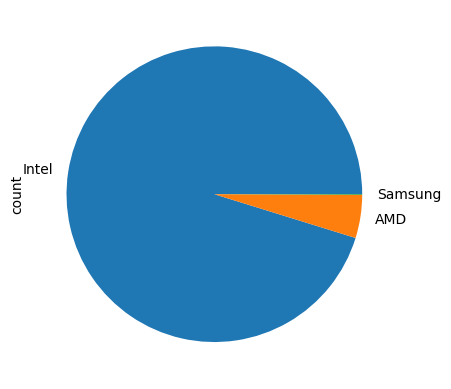

In [ ]:
df['CPU_company'].value_counts().plot(kind='pie')

<Axes: xlabel='SecondaryStorageType'>

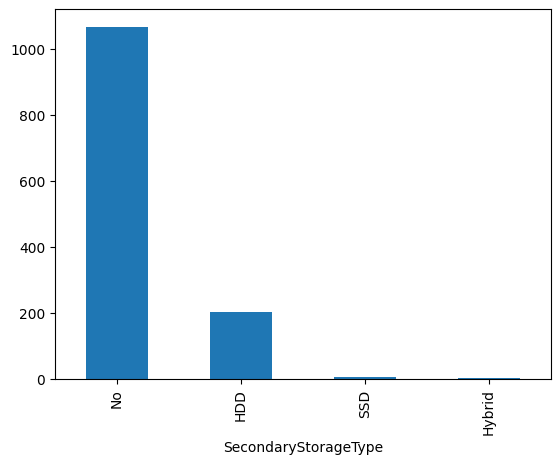

In [ ]:
df['SecondaryStorageType'].value_counts().plot(kind='bar')

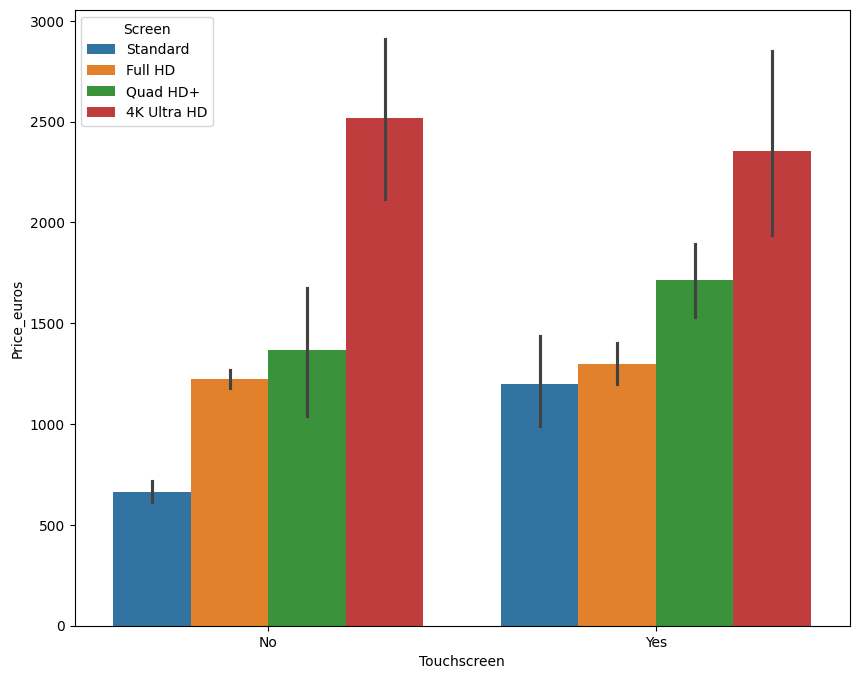

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['Touchscreen'], y= df['Price_euros'] ,
hue = df['Screen'])
plt.show()

Text(0.5, 1.0, 'Ram vs Price')

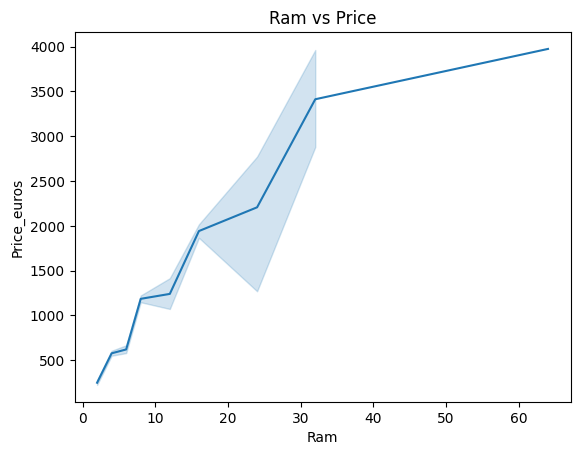

In [ ]:
sns.lineplot(x='Ram',y='Price_euros', data=df)
plt.title('Ram vs Price')

Text(0.5, 1.0, 'Company vs Price')

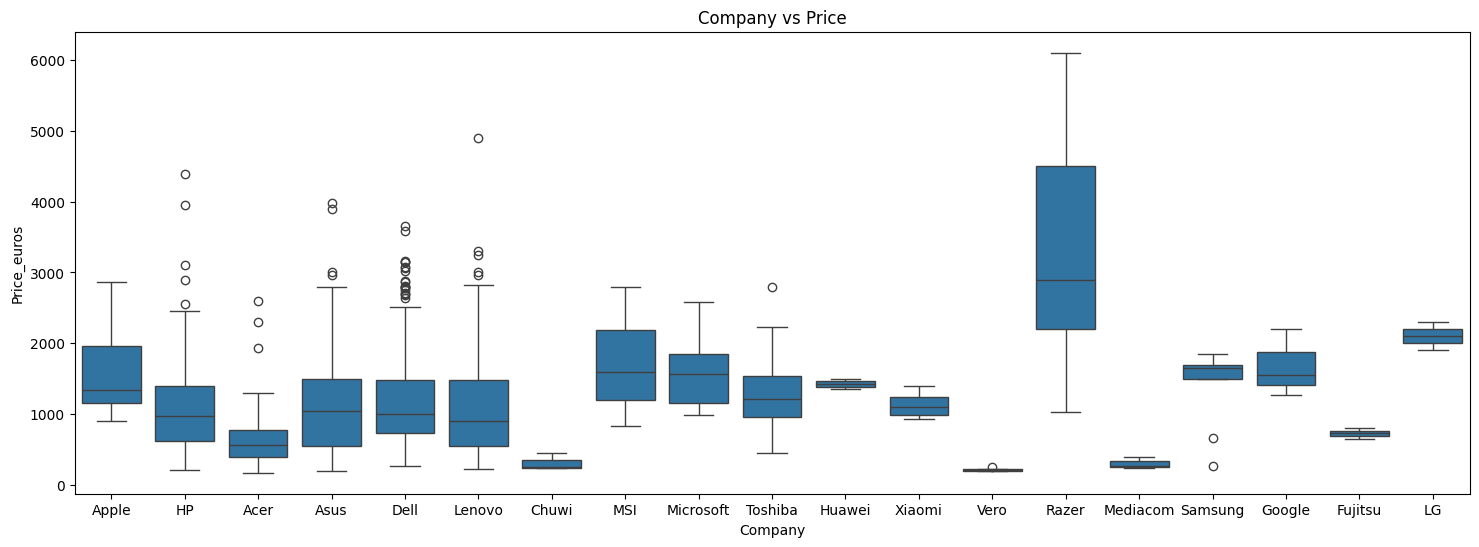

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Company',y='Price_euros', data=df)
plt.title('Company vs Price')

# **Feature Engineering**

In [ ]:
for col in df.columns:
  if df[col].dtype=='object':
    le= LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,1339.69,3,2560,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,898.94,3,1440,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,2537.45,3,2880,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,1803.60,3,2560,...,1,1,3.1,40,256,0,3,2,2,61


In [ ]:
#spliting thr data into two(X,y) varibale
X=df.drop('Price_euros', axis=1) # conatin all coclumn except Price_euros
y=df['Price_euros'] # contain Price_euros

In [ ]:
X

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,3,2560,1600,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,3,1440,900,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,1,1920,1080,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,3,2880,1800,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,3,2560,1600,...,1,1,3.1,40,256,0,3,2,2,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,580,0,14.0,4,5,1.80,1,1920,1080,...,0,1,2.5,55,128,0,3,2,2,49
1271,10,588,0,13.3,16,5,1.30,2,3200,1800,...,0,1,2.5,55,512,0,3,2,2,49
1272,10,196,3,14.0,2,5,1.50,3,1366,768,...,0,1,1.6,20,64,0,0,2,2,42
1273,7,2,3,15.6,6,5,2.19,3,1366,768,...,0,1,2.5,55,1024,0,1,2,0,92


In [ ]:
y

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=400) #Take 80% the data training the model and 20% form testing

# **Model Selection**

In [ ]:
model=LinearRegression() # our first model
model.fit(X_train, y_train)# training of our first model

LinearRegression()

In [ ]:
# hyperparameters
param_grid = {
           'n_estimators': [100, 200, 300],
           'max_depth': [None, 5, 10],
           'min_samples_split': [2, 5, 10]
       }

In [ ]:
rf_model=RandomForestRegressor() # our second model

In [ ]:
 # use it for providing us best combination by which we get better accuracy
grid_search=GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2')
grid_search.fit(X_train, y_train)# training our second model

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
# Extract best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split']
)

# Fit the model
best_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300)

# **Model Evaluation**

In [ ]:
#Score of our first model
y_pred=model.predict(X_test)
print('R2 Square:',r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Square: 74.44999254621119
MAE: 266.6298283544192
MSE: 132375.63917143564
RMSE: 363.834631627386


In [ ]:
# Get the best model for second model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
print('R2 Square:', r2_score(y_test, y_pred)*100)


R2 Square: 87.61354836243292


**Our second model(Random Forest model) give us better prediction about our data**

# **Insights and Visualization**

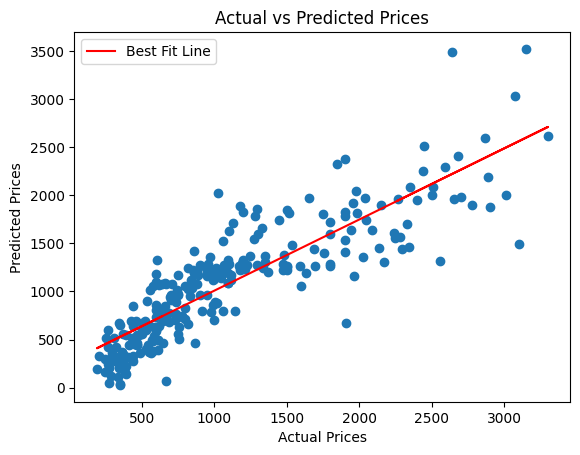

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Calculate the best-fit line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

plt.legend()
plt.show()

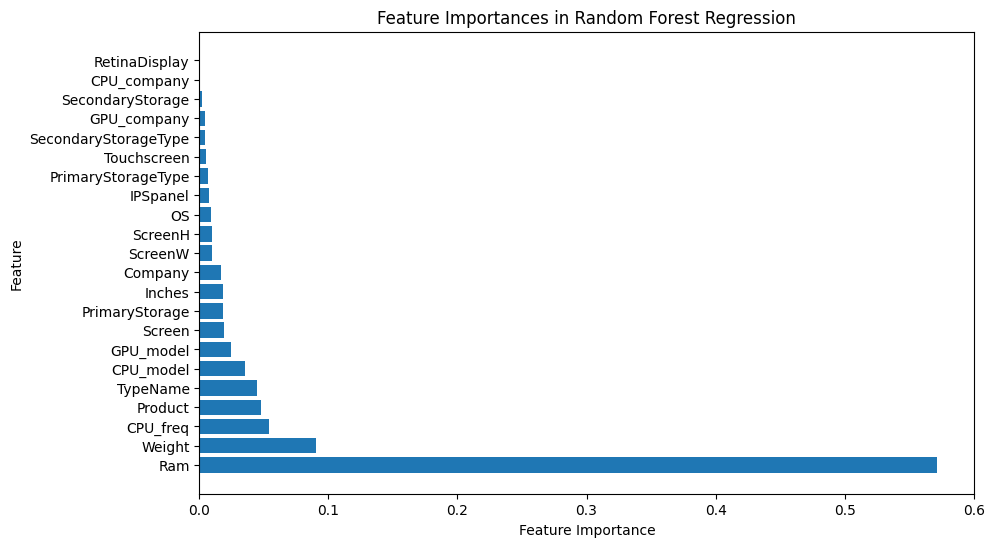

In [ ]:
# Feature Importance Plot
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest Regression")
plt.show()

# **Deployment**

In [ ]:
import pickle

# Save Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save Random Forest Regression model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)